# Practice Burnup pincell
## Geometry and depletion practice
### 16 October 2022

In [1]:
import openmc
import openmc.deplete
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

## Materials

In [2]:
# create fuel material
fuel = openmc.Material(name="uo2")
fuel.add_element("U", 1, percent_type="ao", enrichment=3)
fuel.add_element("O", 2)
fuel.set_density("g/cc", 10.5)
# create clad
clad = openmc.Material(name='clad')
clad.add_element("Zr", 1)
clad.set_density("g/cc", 6.0)
#create water
water = openmc.Material(name="water")
water.add_element("H",2)
water.add_element("O",1)
water.set_density("g/cc",0.712)
water.add_s_alpha_beta('c_H_in_H2O')

materials = openmc.Materials([fuel, clad, water])

## Create Geometry
pincell geometry for burnup calculation

In [3]:
h_cell = 300; # height of pincell

r_fuel = 0.42; # fuel radius
r_pin = 0.45; # clad radius

P_D = 1.4; # pitch to diameter ratio
pitch = P_D*(2*r_pin);

fuel_temp = 900; # representaive fuel temperature (K)
mod_temp = 600; # moderator temp (K)

# fuel cylinder
fuel_cyl = openmc.model.RightCircularCylinder([0,0,-h_cell/2],h_cell,r_fuel);

fuel.volume = np.pi*(r_fuel**2)*h_cell;

# pin cylinder
pin_cyl = openmc.model.RightCircularCylinder([0,0,-(h_cell+(r_pin-r_fuel))/2],h_cell+(r_pin-r_fuel)*2,r_pin);

# pin cell container

core_cell = openmc.model.RectangularParallelepiped(-pitch/2,pitch/2,
                                                   -pitch/2,pitch/2,
                                                   -(h_cell+100)/2,(h_cell+100)/2,
                                                   boundary_type = "reflective");
fuel_cell = openmc.Cell();
fuel_cell.region = -fuel_cyl
fuel_cell.fill = fuel;
fuel_cell.temperature = fuel_temp;

clad_cell = openmc.Cell();
clad_cell.region = +fuel_cyl & -pin_cyl;
clad_cell.fill = clad;

mod_cell = openmc.Cell();
mod_cell.region = +pin_cyl & - core_cell;
mod_cell.fill = water;
mod_cell.temperature = mod_temp;

root_univ = openmc.Universe();
root_univ.add_cells([fuel_cell,clad_cell,mod_cell]);

geometry = openmc.Geometry();
geometry.root_universe = root_univ;

materials.export_to_xml();
geometry.export_to_xml();


# create criticality settings

In [4]:
settings = openmc.Settings();
settings.run_mode = 'eigenvalue';
settings.particles = 20000;
settings.batches = 250;
settings.inactive = 50;

box = openmc.stats.Box(lower_left = (-r_fuel,-r_fuel,-h_cell/2),
                      upper_right = (r_fuel,r_fuel,h_cell/2),
                      only_fissionable=True);
src = openmc.Source(space=box);

settings.source = src;
settings.temperature['method']='interpolation';
settings.export_to_xml();

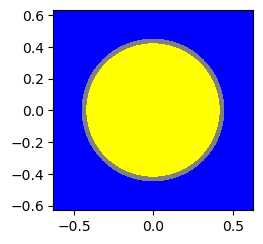

In [5]:
# create color dictionary
colors = {}
colors[water]='blue';
colors[fuel]='yellow';
colors[clad]='gray';

# plot pin cell universe to inspect geometry
root_univ.plot(width=(pitch,pitch),color_by='material',colors=colors);

# Conduct Depletion Calculation

In [ ]:
model = openmc.model.Model(geometry,materials,settings)
operator = openmc.deplete.CoupledOperator(model,"chain_endfb71_pwr.xml");

# typical PWR power density
power_density = [30.5,30.5,30.5,30.5,30.5,
                 30.5,30.5,30.5,0,0]; # power density W/gHM
days = 24*3600;
time_steps = [0.5*days,0.5*days,1*days,5*days,
              23*days,150*days,365*days,365*days,
              365*days,365*days];
cecm = openmc.deplete.CECMIntegrator(operator,time_steps,power_density=power_density);

#repeat_depletion = False;

#if(repeat_depletion):
#    cecm.integrate()

cecm.integrate()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading Mg24 from /home/m231326/omc_data/endfb71_hdf5/Mg24.h5
 Reading Mg25 from /home/m231326/omc_data/endfb71_hdf5/Mg25.h5
 Reading Mg26 from /home/m231326/omc_data/endfb71_hdf5/Mg26.h5
 Reading Al27 from /home/m231326/omc_data/endfb71_hdf5/Al27.h5
 Reading Si28 from /home/m231326/omc_data/endfb71_hdf5/Si28.h5
 Reading Si29 from /home/m231326/omc_data/endfb71_hdf5/Si29.h5
 Reading Si30 from /home/m231326/omc_data/endfb71_hdf5/Si30.h5
 Reading P31 from /home/m231326/omc_data/endfb71_hdf5/P31.h5
 Reading S32 from /home/m231326/omc_data/endfb71_hdf5/S32.h5
 Reading S33 from /home/m231326/omc_data/endfb71_hdf5/S33.h5
 Reading S34 from /home/m231326/omc_data/endfb71_hdf5/S34.h5
 Reading S36 from /home/m231326/omc_data/endfb71_hdf5/S36.h5
 Reading Cl35 from /home/m231326/omc_data/endfb71_hdf5/Cl35.h5
 Reading Cl37 from /home/m231326/omc_data/endfb71_hdf5/Cl37.h5
 Reading Ar36 from /home/m231326/omc_data/endfb71_hdf5/Ar36.h5


 Reading Ar38 from /home/m231326/omc_data/endfb71_hdf5/Ar38.h5
 Reading Ar40 from /home/m231326/omc_data/endfb71_hdf5/Ar40.h5
 Reading K39 from /home/m231326/omc_data/endfb71_hdf5/K39.h5
 Reading K40 from /home/m231326/omc_data/endfb71_hdf5/K40.h5
 Reading K41 from /home/m231326/omc_data/endfb71_hdf5/K41.h5
 Reading Ca40 from /home/m231326/omc_data/endfb71_hdf5/Ca40.h5
 Reading Ca42 from /home/m231326/omc_data/endfb71_hdf5/Ca42.h5
 Reading Ca43 from /home/m231326/omc_data/endfb71_hdf5/Ca43.h5
 Reading Ca44 from /home/m231326/omc_data/endfb71_hdf5/Ca44.h5
 Reading Ca46 from /home/m231326/omc_data/endfb71_hdf5/Ca46.h5
 Reading Ca48 from /home/m231326/omc_data/endfb71_hdf5/Ca48.h5
 Reading Sc45 from /home/m231326/omc_data/endfb71_hdf5/Sc45.h5
 Reading Ti46 from /home/m231326/omc_data/endfb71_hdf5/Ti46.h5
 Reading Ti47 from /home/m231326/omc_data/endfb71_hdf5/Ti47.h5
 Reading Ti48 from /home/m231326/omc_data/endfb71_hdf5/Ti48.h5
 Reading Ti49 from /home/m231326/omc_data/endfb71_hdf5/Ti49.h

 Reading Se80 from /home/m231326/omc_data/endfb71_hdf5/Se80.h5
 Reading Se82 from /home/m231326/omc_data/endfb71_hdf5/Se82.h5
 Reading Br79 from /home/m231326/omc_data/endfb71_hdf5/Br79.h5
 Reading Br81 from /home/m231326/omc_data/endfb71_hdf5/Br81.h5
 Reading Kr78 from /home/m231326/omc_data/endfb71_hdf5/Kr78.h5
 Reading Kr80 from /home/m231326/omc_data/endfb71_hdf5/Kr80.h5
 Reading Kr82 from /home/m231326/omc_data/endfb71_hdf5/Kr82.h5
 Reading Kr83 from /home/m231326/omc_data/endfb71_hdf5/Kr83.h5
 Reading Kr84 from /home/m231326/omc_data/endfb71_hdf5/Kr84.h5
 Reading Kr85 from /home/m231326/omc_data/endfb71_hdf5/Kr85.h5
 Reading Kr86 from /home/m231326/omc_data/endfb71_hdf5/Kr86.h5
 Reading Rb85 from /home/m231326/omc_data/endfb71_hdf5/Rb85.h5
 Reading Rb86 from /home/m231326/omc_data/endfb71_hdf5/Rb86.h5
 Reading Rb87 from /home/m231326/omc_data/endfb71_hdf5/Rb87.h5
 Reading Sr84 from /home/m231326/omc_data/endfb71_hdf5/Sr84.h5
 Reading Sr86 from /home/m231326/omc_data/endfb71_hdf5/

 Reading Nb95 from /home/m231326/omc_data/endfb71_hdf5/Nb95.h5
 Reading Mo92 from /home/m231326/omc_data/endfb71_hdf5/Mo92.h5
 Reading Mo94 from /home/m231326/omc_data/endfb71_hdf5/Mo94.h5
 Reading Mo95 from /home/m231326/omc_data/endfb71_hdf5/Mo95.h5
 Reading Mo96 from /home/m231326/omc_data/endfb71_hdf5/Mo96.h5
 Reading Mo97 from /home/m231326/omc_data/endfb71_hdf5/Mo97.h5
 Reading Mo98 from /home/m231326/omc_data/endfb71_hdf5/Mo98.h5
 Reading Mo99 from /home/m231326/omc_data/endfb71_hdf5/Mo99.h5
 Reading Mo100 from /home/m231326/omc_data/endfb71_hdf5/Mo100.h5
 Reading Tc99 from /home/m231326/omc_data/endfb71_hdf5/Tc99.h5


 Reading Ru96 from /home/m231326/omc_data/endfb71_hdf5/Ru96.h5
 Reading Ru98 from /home/m231326/omc_data/endfb71_hdf5/Ru98.h5
 Reading Ru99 from /home/m231326/omc_data/endfb71_hdf5/Ru99.h5
 Reading Ru100 from /home/m231326/omc_data/endfb71_hdf5/Ru100.h5
 Reading Ru101 from /home/m231326/omc_data/endfb71_hdf5/Ru101.h5
 Reading Ru102 from /home/m231326/omc_data/endfb71_hdf5/Ru102.h5
 Reading Ru103 from /home/m231326/omc_data/endfb71_hdf5/Ru103.h5
 Reading Ru104 from /home/m231326/omc_data/endfb71_hdf5/Ru104.h5
 Reading Ru105 from /home/m231326/omc_data/endfb71_hdf5/Ru105.h5
 Reading Ru106 from /home/m231326/omc_data/endfb71_hdf5/Ru106.h5
 Reading Rh103 from /home/m231326/omc_data/endfb71_hdf5/Rh103.h5
 Reading Rh105 from /home/m231326/omc_data/endfb71_hdf5/Rh105.h5
 Reading Pd102 from /home/m231326/omc_data/endfb71_hdf5/Pd102.h5
 Reading Pd104 from /home/m231326/omc_data/endfb71_hdf5/Pd104.h5
 Reading Pd105 from /home/m231326/omc_data/endfb71_hdf5/Pd105.h5
 Reading Pd106 from /home/m2313

          1200K
          2500K


 Reading Cd110 from /home/m231326/omc_data/endfb71_hdf5/Cd110.h5
 Reading Cd111 from /home/m231326/omc_data/endfb71_hdf5/Cd111.h5
 Reading Cd112 from /home/m231326/omc_data/endfb71_hdf5/Cd112.h5
 Reading Cd113 from /home/m231326/omc_data/endfb71_hdf5/Cd113.h5
 Reading Cd114 from /home/m231326/omc_data/endfb71_hdf5/Cd114.h5
 Reading Cd115_m1 from /home/m231326/omc_data/endfb71_hdf5/Cd115_m1.h5
 Reading Cd116 from /home/m231326/omc_data/endfb71_hdf5/Cd116.h5
 Reading In113 from /home/m231326/omc_data/endfb71_hdf5/In113.h5
 Reading In115 from /home/m231326/omc_data/endfb71_hdf5/In115.h5
 Reading Sn112 from /home/m231326/omc_data/endfb71_hdf5/Sn112.h5
 Reading Sn113 from /home/m231326/omc_data/endfb71_hdf5/Sn113.h5
 Reading Sn114 from /home/m231326/omc_data/endfb71_hdf5/Sn114.h5
 Reading Sn115 from /home/m231326/omc_data/endfb71_hdf5/Sn115.h5
 Reading Sn116 from /home/m231326/omc_data/endfb71_hdf5/Sn116.h5
 Reading Sn117 from /home/m231326/omc_data/endfb71_hdf5/Sn117.h5
 Reading Sn118 from

          1200K
          2500K


 Reading Sn126 from /home/m231326/omc_data/endfb71_hdf5/Sn126.h5
 Reading Sb121 from /home/m231326/omc_data/endfb71_hdf5/Sb121.h5
 Reading Sb123 from /home/m231326/omc_data/endfb71_hdf5/Sb123.h5
 Reading Sb124 from /home/m231326/omc_data/endfb71_hdf5/Sb124.h5
 Reading Sb125 from /home/m231326/omc_data/endfb71_hdf5/Sb125.h5
 Reading Sb126 from /home/m231326/omc_data/endfb71_hdf5/Sb126.h5
 Reading Te120 from /home/m231326/omc_data/endfb71_hdf5/Te120.h5
 Reading Te122 from /home/m231326/omc_data/endfb71_hdf5/Te122.h5
 Reading Te123 from /home/m231326/omc_data/endfb71_hdf5/Te123.h5
 Reading Te124 from /home/m231326/omc_data/endfb71_hdf5/Te124.h5
 Reading Te125 from /home/m231326/omc_data/endfb71_hdf5/Te125.h5
 Reading Te126 from /home/m231326/omc_data/endfb71_hdf5/Te126.h5


          1200K
          2500K


 Reading Te127_m1 from /home/m231326/omc_data/endfb71_hdf5/Te127_m1.h5
 Reading Te128 from /home/m231326/omc_data/endfb71_hdf5/Te128.h5
 Reading Te129_m1 from /home/m231326/omc_data/endfb71_hdf5/Te129_m1.h5
 Reading Te130 from /home/m231326/omc_data/endfb71_hdf5/Te130.h5
 Reading Te132 from /home/m231326/omc_data/endfb71_hdf5/Te132.h5
 Reading I127 from /home/m231326/omc_data/endfb71_hdf5/I127.h5
 Reading I129 from /home/m231326/omc_data/endfb71_hdf5/I129.h5
 Reading I130 from /home/m231326/omc_data/endfb71_hdf5/I130.h5
 Reading I131 from /home/m231326/omc_data/endfb71_hdf5/I131.h5
 Reading I135 from /home/m231326/omc_data/endfb71_hdf5/I135.h5
 Reading Xe123 from /home/m231326/omc_data/endfb71_hdf5/Xe123.h5


 Reading Xe124 from /home/m231326/omc_data/endfb71_hdf5/Xe124.h5
 Reading Xe126 from /home/m231326/omc_data/endfb71_hdf5/Xe126.h5
 Reading Xe128 from /home/m231326/omc_data/endfb71_hdf5/Xe128.h5
 Reading Xe129 from /home/m231326/omc_data/endfb71_hdf5/Xe129.h5
 Reading Xe130 from /home/m231326/omc_data/endfb71_hdf5/Xe130.h5
 Reading Xe131 from /home/m231326/omc_data/endfb71_hdf5/Xe131.h5
 Reading Xe132 from /home/m231326/omc_data/endfb71_hdf5/Xe132.h5
 Reading Xe133 from /home/m231326/omc_data/endfb71_hdf5/Xe133.h5
 Reading Xe134 from /home/m231326/omc_data/endfb71_hdf5/Xe134.h5
 Reading Xe135 from /home/m231326/omc_data/endfb71_hdf5/Xe135.h5
 Reading Xe136 from /home/m231326/omc_data/endfb71_hdf5/Xe136.h5
 Reading Cs133 from /home/m231326/omc_data/endfb71_hdf5/Cs133.h5


          2500K


 Reading Cs134 from /home/m231326/omc_data/endfb71_hdf5/Cs134.h5
 Reading Cs135 from /home/m231326/omc_data/endfb71_hdf5/Cs135.h5
 Reading Cs136 from /home/m231326/omc_data/endfb71_hdf5/Cs136.h5
 Reading Cs137 from /home/m231326/omc_data/endfb71_hdf5/Cs137.h5
 Reading Ba130 from /home/m231326/omc_data/endfb71_hdf5/Ba130.h5
 Reading Ba132 from /home/m231326/omc_data/endfb71_hdf5/Ba132.h5
 Reading Ba133 from /home/m231326/omc_data/endfb71_hdf5/Ba133.h5


          1200K
          2500K


 Reading Ba134 from /home/m231326/omc_data/endfb71_hdf5/Ba134.h5
 Reading Ba135 from /home/m231326/omc_data/endfb71_hdf5/Ba135.h5
 Reading Ba136 from /home/m231326/omc_data/endfb71_hdf5/Ba136.h5
 Reading Ba137 from /home/m231326/omc_data/endfb71_hdf5/Ba137.h5
 Reading Ba138 from /home/m231326/omc_data/endfb71_hdf5/Ba138.h5
 Reading Ba140 from /home/m231326/omc_data/endfb71_hdf5/Ba140.h5
 Reading La138 from /home/m231326/omc_data/endfb71_hdf5/La138.h5
 Reading La139 from /home/m231326/omc_data/endfb71_hdf5/La139.h5
 Reading La140 from /home/m231326/omc_data/endfb71_hdf5/La140.h5
 Reading Ce136 from /home/m231326/omc_data/endfb71_hdf5/Ce136.h5
 Reading Ce138 from /home/m231326/omc_data/endfb71_hdf5/Ce138.h5
 Reading Ce139 from /home/m231326/omc_data/endfb71_hdf5/Ce139.h5
 Reading Ce140 from /home/m231326/omc_data/endfb71_hdf5/Ce140.h5
 Reading Ce141 from /home/m231326/omc_data/endfb71_hdf5/Ce141.h5
 Reading Ce142 from /home/m231326/omc_data/endfb71_hdf5/Ce142.h5
 Reading Ce143 from /home

          1200K
          2500K


 Reading Gd152 from /home/m231326/omc_data/endfb71_hdf5/Gd152.h5
 Reading Gd153 from /home/m231326/omc_data/endfb71_hdf5/Gd153.h5
 Reading Gd154 from /home/m231326/omc_data/endfb71_hdf5/Gd154.h5
 Reading Gd155 from /home/m231326/omc_data/endfb71_hdf5/Gd155.h5
 Reading Gd156 from /home/m231326/omc_data/endfb71_hdf5/Gd156.h5
 Reading Gd157 from /home/m231326/omc_data/endfb71_hdf5/Gd157.h5
 Reading Gd158 from /home/m231326/omc_data/endfb71_hdf5/Gd158.h5
 Reading Gd160 from /home/m231326/omc_data/endfb71_hdf5/Gd160.h5
 Reading Tb159 from /home/m231326/omc_data/endfb71_hdf5/Tb159.h5
 Reading Tb160 from /home/m231326/omc_data/endfb71_hdf5/Tb160.h5
 Reading Dy156 from /home/m231326/omc_data/endfb71_hdf5/Dy156.h5
 Reading Dy158 from /home/m231326/omc_data/endfb71_hdf5/Dy158.h5
 Reading Dy160 from /home/m231326/omc_data/endfb71_hdf5/Dy160.h5
 Reading Dy161 from /home/m231326/omc_data/endfb71_hdf5/Dy161.h5
 Reading Dy162 from /home/m231326/omc_data/endfb71_hdf5/Dy162.h5
 Reading Dy163 from /home

 Reading Cf246 from /home/m231326/omc_data/endfb71_hdf5/Cf246.h5
 Reading Cf248 from /home/m231326/omc_data/endfb71_hdf5/Cf248.h5
 Reading Cf249 from /home/m231326/omc_data/endfb71_hdf5/Cf249.h5
 Reading Cf250 from /home/m231326/omc_data/endfb71_hdf5/Cf250.h5
 Reading Cf251 from /home/m231326/omc_data/endfb71_hdf5/Cf251.h5
 Reading Cf252 from /home/m231326/omc_data/endfb71_hdf5/Cf252.h5


          1200K


 Reading Cf253 from /home/m231326/omc_data/endfb71_hdf5/Cf253.h5
 Reading Cf254 from /home/m231326/omc_data/endfb71_hdf5/Cf254.h5
 Reading Es251 from /home/m231326/omc_data/endfb71_hdf5/Es251.h5
 Reading Es252 from /home/m231326/omc_data/endfb71_hdf5/Es252.h5
 Reading Es253 from /home/m231326/omc_data/endfb71_hdf5/Es253.h5
 Reading Es254 from /home/m231326/omc_data/endfb71_hdf5/Es254.h5
[openmc.deplete] t=43200.0 s, dt=43200.0 s, source=46932.97813097093
[openmc.deplete] t=86400.0 s, dt=86400.0 s, source=46932.97813097093
 Reading Es254_m1 from /home/m231326/omc_data/endfb71_hdf5/Es254_m1.h5
 Reading Es255 from /home/m231326/omc_data/endfb71_hdf5/Es255.h5
 Reading Fm255 from /home/m231326/omc_data/endfb71_hdf5/Fm255.h5
 Maximum neutron transport energy: 20000000 eV for O17
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.

      142/1    1.27339    1.27460 +/- 0.00126
      143/1    1.26822    1.27453 +/- 0.00124
      144/1    1.28272    1.27461 +/- 0.00123
      145/1    1.27630    1.27463 +/- 0.00122
      146/1    1.28403    1.27473 +/- 0.00121
      147/1    1.28617    1.27485 +/- 0.00121
      148/1    1.27641    1.27486 +/- 0.00119
      149/1    1.27137    1.27483 +/- 0.00118
      150/1    1.25274    1.27461 +/- 0.00119
      151/1    1.27910    1.27465 +/- 0.00118
      152/1    1.27498    1.27466 +/- 0.00117
      153/1    1.27552    1.27466 +/- 0.00116
      154/1    1.26129    1.27454 +/- 0.00115
      155/1    1.26747    1.27447 +/- 0.00114
      156/1    1.25651    1.27430 +/- 0.00115
      157/1    1.26656    1.27423 +/- 0.00114
      158/1    1.27306    1.27422 +/- 0.00113
      159/1    1.26323    1.27412 +/- 0.00112
      160/1    1.28441    1.27421 +/- 0.00111
      161/1    1.25948    1.27408 +/- 0.00111
      162/1    1.28182    1.27415 +/- 0.00110
      163/1    1.26876    1.27410 

In [ ]:
results = openmc.deplete.Results("./depletion_results.h5")

In [ ]:
time,k = results.get_keff()
time /= (24*3600)

plt.errorbar(time,k[:,0],yerr=k[:,1])
plt.title('Criticality over time of LEU Pincell')
plt.xlabel("Time (d)")
plt.ylabel("$k_{eff} \pm \sigma$")
plt.grid()

In [ ]:
time, Pu239 = results.get_atoms("1","Pu239")
time, Pu240 = results.get_atoms("1","Pu240")
time, Pu241 = results.get_atoms("1","Pu241")
time, Pu242 = results.get_atoms("1","Pu242")

plt.semilogy(time,Pu239,label="Pu239")
plt.semilogy(time,Pu240,label="Pu240")
plt.semilogy(time,Pu241,label="Pu241")
plt.semilogy(time,Pu242,label="Pu242")
plt.legend()
plt.grid()
plt.title("LEU Pincell Pu Buildup")
plt.xlabel("Time (d)")
plt.ylabel("Number of atoms")

In [ ]:
total_pu = Pu239 + Pu240 + Pu241 + Pu242
Pu239_frac = Pu239/total_pu

plt.plot(time,Pu239_frac,label="Fraction Pu239")
plt.grid()
plt.title("LEU Pincell Pu239/Pu Over Core Life")
plt.xlabel("time [d]")
plt.ylabel("Fraction Pu239")